In [2]:
!pip --version
!pip install pandas
!pip install kaggle
!pip install codeium-jupyter

pip 24.0 from C:\ProgramData\anaconda3\Lib\site-packages\pip (python 3.12)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
from urllib.request import urlretrieve
import requests
# url = "https://raw.githubusercontent.com/Sanket9122/datasets/refs/heads/main/Energy%20Consumptions%20Dataset.csv?token=GHSAT0AAAAAAC5EBWUN2NDXBEQC73T74E44Z5MXE4Q"
# response = requests.get(url)
# if response.status_code == 200  :
#     print ('url is correct :{response.status_code}')
#     urlretrieve("https://raw.githubusercontent.com/Sanket9122/datasets/refs/heads/main/Energy%20Consumptions%20Dataset.csv?token=GHSAT0AAAAAAC5EBWUN2NDXBEQC73T74E44Z5MXE4Q" , "energy_trends.csv")
#     energy_trends_df = pd.read_csv('energy_trends.csv')
# else :
    # print ({response.status_code}

In [5]:
energy_trends_df = pd.read_csv('Energy Consumptions Dataset.csv')

In [6]:
energy_trends_df

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,01/01/2016,B1000,346159,38819,3378
1,01/01/2016,B1001,281717,46252,2187
2,01/01/2016,B1002,259530,41091,3173
3,01/01/2016,B1003,309176,25577,3581
4,01/01/2016,B1004,257742,33917,4709
...,...,...,...,...,...
523,12/01/2019,B1006,296157,33938,4931
524,12/01/2019,B1007,319388,37106,4748
525,12/01/2019,B1008,251866,47079,5909
526,12/01/2019,B1009,280510,48134,5492


In [7]:
energy_trends_df['Date'] =  pd.to_datetime(energy_trends_df['Date'],format = "%d/%m/%Y")
energy_trends_df

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,2016-01-01,B1000,346159,38819,3378
1,2016-01-01,B1001,281717,46252,2187
2,2016-01-01,B1002,259530,41091,3173
3,2016-01-01,B1003,309176,25577,3581
4,2016-01-01,B1004,257742,33917,4709
...,...,...,...,...,...
523,2019-01-12,B1006,296157,33938,4931
524,2019-01-12,B1007,319388,37106,4748
525,2019-01-12,B1008,251866,47079,5909
526,2019-01-12,B1009,280510,48134,5492


In [8]:
print(energy_trends_df.isnull().sum())
print(energy_trends_df.duplicated().sum())

Date                       0
Building                   0
Water Consumption          0
Electricity Consumption    0
Gas Consumption            0
dtype: int64
0


In [9]:
type(energy_trends_df)

pandas.core.frame.DataFrame

In [10]:
energy_trends_df.head(80)


,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,2016-01-01,B1000,346159,38819,3378
1,2016-01-01,B1001,281717,46252,2187
2,2016-01-01,B1002,259530,41091,3173
3,2016-01-01,B1003,309176,25577,3581
4,2016-01-01,B1004,257742,33917,4709
...,...,...,...,...,...
75,2016-01-07,B1009,205516,37058,5334
76,2016-01-07,B1010,333281,50319,4902
77,2016-01-08,B1000,252698,45063,2995
78,2016-01-08,B1001,223918,33654,4406


In [11]:
energy_trends_df.tail(80)

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
448,2019-01-05,B1008,293969,38654,4795
449,2019-01-05,B1009,226483,51402,5230
450,2019-01-05,B1010,380881,51980,4578
451,2019-01-06,B1000,236306,38618,6919
452,2019-01-06,B1001,502128,39206,5801
...,...,...,...,...,...
523,2019-01-12,B1006,296157,33938,4931
524,2019-01-12,B1007,319388,37106,4748
525,2019-01-12,B1008,251866,47079,5909
526,2019-01-12,B1009,280510,48134,5492


In [12]:
energy_trends_df.sample(25)

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
488,2019-01-09,B1004,369415,53877,6204
453,2019-01-06,B1002,319935,48613,6957
257,2017-01-12,B1004,491868,41297,4335
200,2017-01-07,B1002,416264,25068,5473
93,2016-01-09,B1005,404468,44257,2509
61,2016-01-06,B1006,499003,46981,3201
315,2018-01-05,B1007,500394,30591,5355
207,2017-01-07,B1009,404183,33902,3600
189,2017-01-06,B1002,288169,43250,5487
387,2018-01-12,B1002,365522,44632,6355


In [13]:
energy_trends_df.describe()

,Date,Water Consumption,Electricity Consumption,Gas Consumption
count,528,528.000000,528.000000,528.000000
mean,2017-07-07 18:00:00,352737.361742,41035.943182,4835.393939
min,2016-01-01 00:00:00,202733.000000,21445.000000,2149.000000
25%,2016-10-04 06:00:00,271849.750000,33845.500000,4074.500000
50%,2017-07-08 00:00:00,348379.000000,41085.000000,4851.500000
75%,2018-04-10 12:00:00,429888.250000,48677.250000,5590.500000
max,2019-01-12 00:00:00,505757.000000,59522.000000,7351.000000
std,NaN,90883.262407,9199.546250,1137.674361


In [14]:
energy_trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     528 non-null    datetime64[ns]
 1   Building                 528 non-null    object        
 2   Water Consumption        528 non-null    int64         
 3   Electricity Consumption  528 non-null    int64         
 4   Gas Consumption          528 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 20.8+ KB


In [15]:
energy_trends_df.sort_values(by='Date')

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption
0,2016-01-01,B1000,346159,38819,3378
1,2016-01-01,B1001,281717,46252,2187
2,2016-01-01,B1002,259530,41091,3173
3,2016-01-01,B1003,309176,25577,3581
4,2016-01-01,B1004,257742,33917,4709
...,...,...,...,...,...
522,2019-01-12,B1005,337879,38611,4889
523,2019-01-12,B1006,296157,33938,4931
524,2019-01-12,B1007,319388,37106,4748
525,2019-01-12,B1008,251866,47079,5909


In [16]:
energy_trends_df['Total_Energy_Consumption'] = energy_trends_df['Water Consumption']+energy_trends_df['Electricity Consumption']+energy_trends_df['Gas Consumption']
energy_trends_df

,Date,Building,Water Consumption,Electricity Consumption,Gas Consumption,Total_Energy_Consumption
0,2016-01-01,B1000,346159,38819,3378,388356
1,2016-01-01,B1001,281717,46252,2187,330156
2,2016-01-01,B1002,259530,41091,3173,303794
3,2016-01-01,B1003,309176,25577,3581,338334
4,2016-01-01,B1004,257742,33917,4709,296368
...,...,...,...,...,...,...
523,2019-01-12,B1006,296157,33938,4931,335026
524,2019-01-12,B1007,319388,37106,4748,361242
525,2019-01-12,B1008,251866,47079,5909,304854
526,2019-01-12,B1009,280510,48134,5492,334136


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

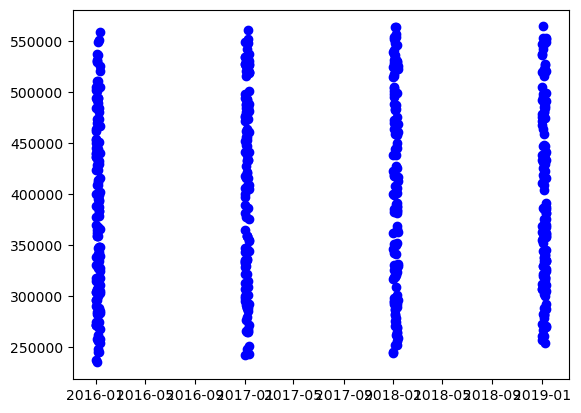

In [18]:
plt.plot(energy_trends_df['Date'] , energy_trends_df['Total_Energy_Consumption' ],linestyle="" , marker = 'o' , color = 'blue');

In [19]:
Water_Consumption = energy_trends_df[['Water Consumption', 'Date']]
Water_Consumption



,Water Consumption,Date
0,346159,2016-01-01
1,281717,2016-01-01
2,259530,2016-01-01
3,309176,2016-01-01
4,257742,2016-01-01
...,...,...
523,296157,2019-01-12
524,319388,2019-01-12
525,251866,2019-01-12
526,280510,2019-01-12


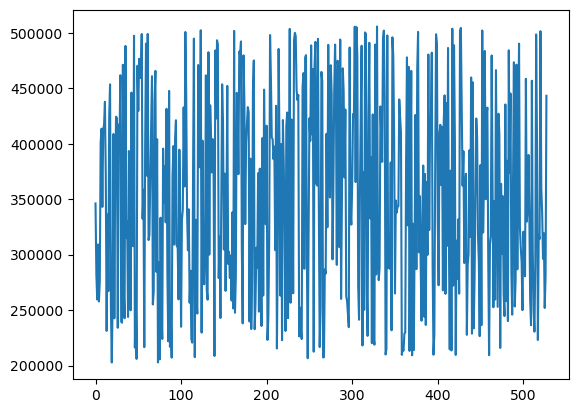

In [20]:
plt.plot(Water_Consumption['Water Consumption']);

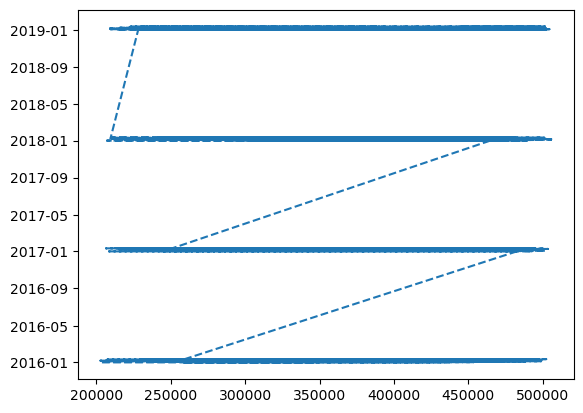

In [21]:
plt.plot(Water_Consumption['Water Consumption'] , Water_Consumption['Date'] , linestyle='dashed');

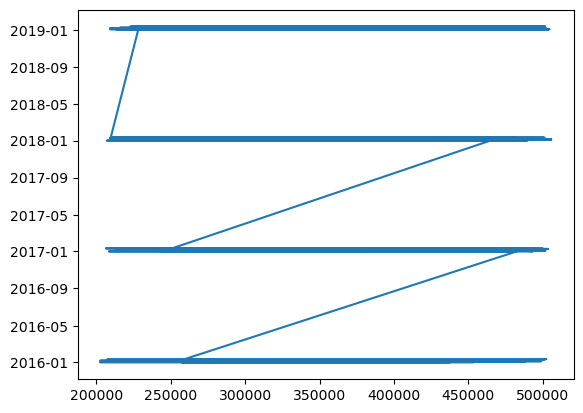

In [22]:
plt.plot(energy_trends_df['Water Consumption'] , energy_trends_df['Date'] );

In [23]:
energy_trends_df['average_energy_consumption'] = (energy_trends_df['Water Consumption']+energy_trends_df['Electricity Consumption']+energy_trends_df['Gas Consumption'])/3
energy_trends_df['average_energy_consumption']

0      129452.000000
1      110052.000000
2      101264.666667
3      112778.000000
4       98789.333333
           ...      
523    111675.333333
524    120414.000000
525    101618.000000
526    111378.666667
527    163639.666667
Name: average_energy_consumption, Length: 528, dtype: float64

In [24]:
average_water_consumption = sum(energy_trends_df['Water Consumption']) / len(energy_trends_df['Water Consumption'])
average_water_consumption

352737.36174242425

In [25]:
average_electricity_consumption = sum(energy_trends_df['Electricity Consumption']) / len(energy_trends_df['Electricity Consumption'])
average_electricity_consumption

41035.943181818184

In [26]:
average_gas_consumption  = sum(energy_trends_df['Gas Consumption']) /len(energy_trends_df['Gas Consumption'])
average_gas_consumption

4835.393939393939

In [48]:
highest_water_consumption = Water_Consumption.loc[Water_Consumption['Water Consumption'] .idxmax()]
highest_water_consumption

Water Consumption                 505757
Date                 2018-01-06 00:00:00
Name: 329, dtype: object

In [52]:
lowest_water_consumption = Water_Consumption.loc[Water_Consumption['Water Consumption'].idxmin()]
lowest_water_consumption

Water Consumption                 202733
Date                 2016-01-02 00:00:00
Name: 19, dtype: object

In [58]:
highest_electricity_consumption  = Electricity_Consumption.loc[Electricity_Consumpiton['Electricity Consumption'].idxmax()]

NameError: name 'Electricity_Consumption' is not defined